# **Setup Model, Data Loader, Optimizer and Loss**

In [3]:
from models import networks as n
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as opt

from util import losses as loss
from util import loaders as load
from util import training as train
from util import helpers as helper
from models import networks as n


############################################################################
# Network
############################################################################

res_net = n.CustomResnet(51)
res_net.cuda()

############################################################################
# Loss
############################################################################

mse_crit = loss.LogCoshLoss()
point_crit = loss.PointLoss().cuda()

############################################################################
# Optimizer
############################################################################

lr = 1e-3
lr_array = np.array([lr/100,lr/10,lr])
lr_groups = res_net.lr_groups()

opt_params = [{"params":lr_groups[0].parameters(),"lr":lr_array[0]},
              {"params":lr_groups[1].parameters(),"lr":lr_array[1]},
              {"params":lr_groups[2].parameters(),"lr":lr_array[2]}]

adam_opt = opt.Adam(opt_params,betas=(0.9, 0.999),
                    weight_decay= .0001)

############################################################################
# Data Generators
############################################################################

transform = load.NormDenorm([.5, .5, .5],
                            [.5, .5, .5])

train_data= load.LandMarkGenerator( transform,
                                   output_res=128,
                                   size = 10000,
                                   rand_rot = .7)

test_data = load.LandMarkGenerator( transform,
                                   output_res=128,
                                   size = 300,
                                   rand_rot = .7)  
 
batch_size = 8

mtrain = torch.utils.data.DataLoader(train_data,
                                     batch_size=batch_size,
                                     num_workers=8,
                                     shuffle=True,
                                     drop_last=True)

mtest  = torch.utils.data.DataLoader(test_data
                                     batch_size=batch_size,
                                     num_workers=8,
                                     shuffle=False,
                                     drop_last=True)

############################################################################
# Train Dictionary
############################################################################

train_dict = {
    "train_loader":mtrain,
    "test_loader":mtest,
    "opt":adam_opt,
    "net":res_net,
    "mse_crit":mse_crit,
    "point_crit":point_crit
}

output_name = "test_"

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


# **View Data Sample**

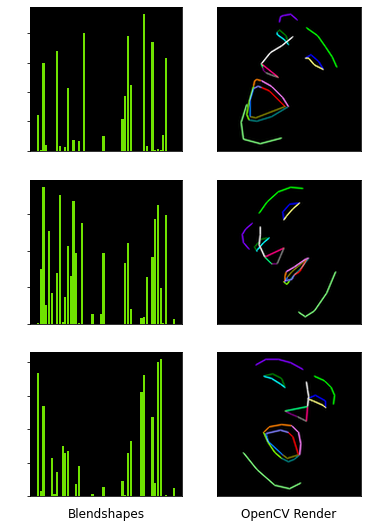

In [4]:
% matplotlib inline
helper.view_dataset(train_data,transform)

# **Train Round One**

Run #1


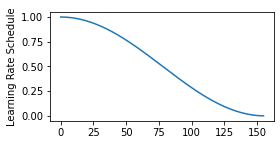

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:False
Layer 3 : Grad:False
Layer 4 : Grad:False
Layer 5 : Grad:False
train mse_loss: 0.06597622483968735   train point_loss: 0.0060711572878062725
test mse_loss: 0.048689063638448715   test point_loss: 0.005276250187307596
Done
Run #2


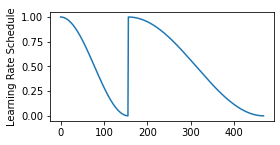

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:False
Layer 3 : Grad:False
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.049534205347299576   train point_loss: 0.0050585465505719185
test mse_loss: 0.04290212318301201   test point_loss: 0.004229005426168442
Done
Run #3


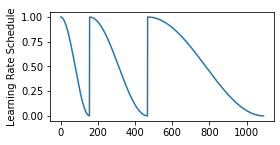

Layer 0 : Grad:False
Layer 1 : Grad:False
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.04291214793920517   train point_loss: 0.0042191557586193085
test mse_loss: 0.03459031879901886   test point_loss: 0.0033041578717529774
Done
Run #4


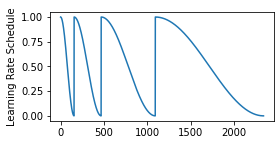

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.039111681282520294   train point_loss: 0.003866851795464754
test mse_loss: 0.04446111246943474   test point_loss: 0.00400257995352149
train mse_loss: 0.034954529255628586   train point_loss: 0.0035280983429402113
test mse_loss: 0.027785159647464752   test point_loss: 0.0027049824129790068
Done
Run #5


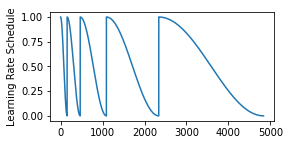

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.03543548285961151   train point_loss: 0.0035855404566973448
test mse_loss: 0.04161377251148224   test point_loss: 0.0045189447700977325
train mse_loss: 0.03295208886265755   train point_loss: 0.0033920318819582462
test mse_loss: 0.03616492077708244   test point_loss: 0.003670673817396164
train mse_loss: 0.03397095575928688   train point_loss: 0.003505915170535445
test mse_loss: 0.029416052624583244   test point_loss: 0.0030900961719453335
train mse_loss: 0.027289651334285736   train point_loss: 0.0028479313477873802
test mse_loss: 0.02422931417822838   test point_loss: 0.0025632670149207115
Done
Run #6


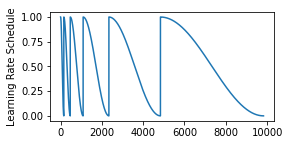

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.030899640172719955   train point_loss: 0.0032333892304450274
test mse_loss: 0.032229579985141754   test point_loss: 0.0033191004768013954
train mse_loss: 0.029314307495951653   train point_loss: 0.0030738082714378834
test mse_loss: 0.03467357158660889   test point_loss: 0.0037781591527163982
train mse_loss: 0.030148465186357498   train point_loss: 0.003177541308104992
test mse_loss: 0.02645137347280979   test point_loss: 0.0027857646346092224
train mse_loss: 0.026044290512800217   train point_loss: 0.0027411491610109806
test mse_loss: 0.02925381064414978   test point_loss: 0.0032720244489610195
train mse_loss: 0.02974032610654831   train point_loss: 0.0031533355358988047
test mse_loss: 0.02817605249583721   test point_loss: 0.0030842877458781004
train mse_loss: 0.027715560048818588   train point_loss: 0.002957511693239212
test mse_loss: 0.02603378519

In [5]:
lr = 1e-3  
lr_array = np.array([lr/5,lr/5,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)
    freeze = (i-1)*2
    if i == 4:
        freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)

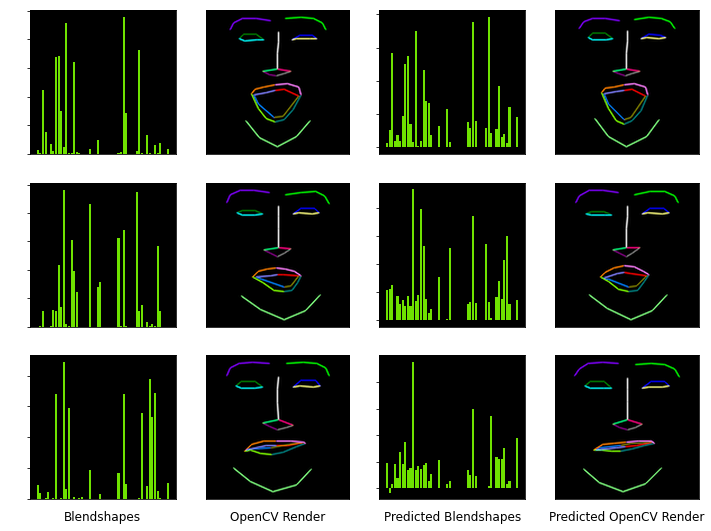

/content/facial-pose-estimation-pytorch-v2/models/networks.py:192: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  bs = int(tensor.shape[0])
/content/facial-pose-estimation-pytorch-v2/models/networks.py:193: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  res = int(tensor.shape[2])


In [6]:
helper.view_predictions(res_net,train_data)
helper.save_jit('output_run',1,res_net)

# **Train Round Two**

Run #1


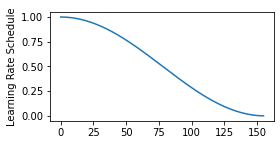

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.021557137370109558   train point_loss: 0.002349080517888069
test mse_loss: 0.021712271496653557   test point_loss: 0.0023173936642706394
Done
Run #2


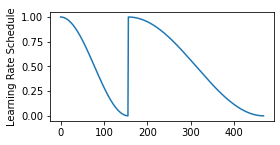

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.02209210954606533   train point_loss: 0.002377038821578026
test mse_loss: 0.02044540084898472   test point_loss: 0.0022437565494328737
Done
Run #3


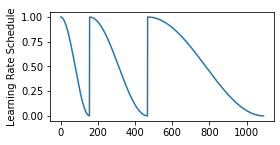

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.02194763533771038   train point_loss: 0.002364701358601451
test mse_loss: 0.020582448691129684   test point_loss: 0.0022913881111890078
Done
Run #4


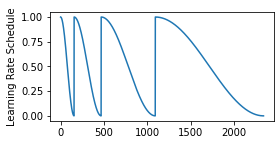

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.0213227067142725   train point_loss: 0.0023160262499004602
test mse_loss: 0.020892390981316566   test point_loss: 0.002253162208944559
train mse_loss: 0.02099546045064926   train point_loss: 0.002292998367920518
test mse_loss: 0.020262040197849274   test point_loss: 0.002179529517889023
Done
Run #5


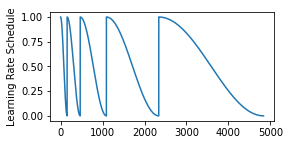

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.020724715664982796   train point_loss: 0.0022810879163444042
test mse_loss: 0.020732169970870018   test point_loss: 0.0023056603968143463
train mse_loss: 0.02057548798620701   train point_loss: 0.002263073343783617
test mse_loss: 0.02015833556652069   test point_loss: 0.0021853544749319553
train mse_loss: 0.020388858392834663   train point_loss: 0.0022616498172283173
test mse_loss: 0.019237643107771873   test point_loss: 0.0021151630207896233
train mse_loss: 0.01966077834367752   train point_loss: 0.002178944181650877
test mse_loss: 0.018460456281900406   test point_loss: 0.002131556160748005
Done
Run #6


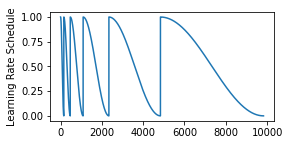

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.019873034209012985   train point_loss: 0.002218780806288123
test mse_loss: 0.020003650337457657   test point_loss: 0.002158184302970767
train mse_loss: 0.019885128363966942   train point_loss: 0.0022094736341387033
test mse_loss: 0.01858045719563961   test point_loss: 0.0021409071050584316
train mse_loss: 0.020086020231246948   train point_loss: 0.0022404270712286234
test mse_loss: 0.01901203766465187   test point_loss: 0.0021518610883504152
train mse_loss: 0.019030090421438217   train point_loss: 0.00214896141551435
test mse_loss: 0.0194365493953228   test point_loss: 0.0021326281130313873
train mse_loss: 0.019838908687233925   train point_loss: 0.0022248306777328253
test mse_loss: 0.018778564408421516   test point_loss: 0.002079463331028819
train mse_loss: 0.01909390091896057   train point_loss: 0.0021587852388620377
test mse_loss: 0.01804515905678

In [7]:
lr = 1e-4  
lr_array = np.array([lr/5,lr/3,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)

    freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)

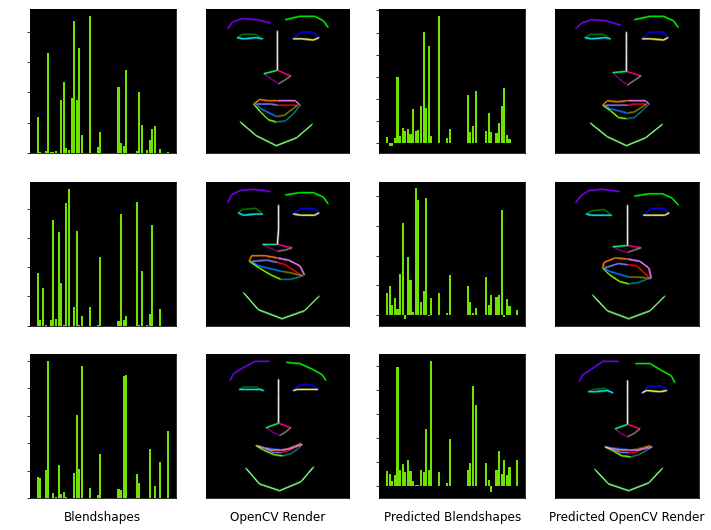

/content/facial-pose-estimation-pytorch-v2/models/networks.py:192: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  bs = int(tensor.shape[0])
/content/facial-pose-estimation-pytorch-v2/models/networks.py:193: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  res = int(tensor.shape[2])


In [9]:
helper.view_predictions(res_net,train_data)
helper.save_jit('output_run',2,res_net)

# **Train Round Three**

Run #1


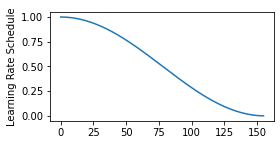

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.01781870797276497   train point_loss: 0.0020378243643790483
test mse_loss: 0.017577603459358215   test point_loss: 0.0020213578827679157
Done
Run #2


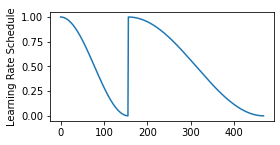

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.018110360950231552   train point_loss: 0.00206194119527936
test mse_loss: 0.01766286790370941   test point_loss: 0.0020310564432293177
Done
Run #3


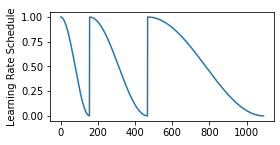

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.017937056720256805   train point_loss: 0.002060355618596077
test mse_loss: 0.01730562373995781   test point_loss: 0.0019756692927330732
Done
Run #4


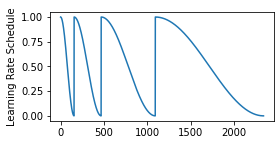

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.01798085868358612   train point_loss: 0.0020550715271383524
test mse_loss: 0.01781369559466839   test point_loss: 0.001930275117047131
train mse_loss: 0.0177001990377903   train point_loss: 0.0020290284883230925
test mse_loss: 0.0173195768147707   test point_loss: 0.001970357494428754
Done
Run #5


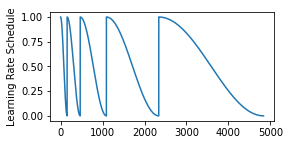

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.017835421487689018   train point_loss: 0.0020473957993090153
test mse_loss: 0.01616506837308407   test point_loss: 0.0018701140070334077
train mse_loss: 0.017729826271533966   train point_loss: 0.0020211280789226294
test mse_loss: 0.017824402078986168   test point_loss: 0.0020315793808549643
train mse_loss: 0.01776314154267311   train point_loss: 0.002034122357144952
test mse_loss: 0.017402075231075287   test point_loss: 0.0019391292007640004
train mse_loss: 0.017565803602337837   train point_loss: 0.00202244333922863
test mse_loss: 0.01815575733780861   test point_loss: 0.0020861055236309767
Done
Run #6


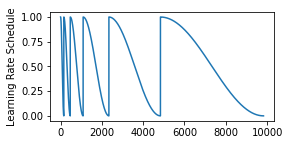

Layer 0 : Grad:True
Layer 1 : Grad:True
Layer 2 : Grad:True
Layer 3 : Grad:True
Layer 4 : Grad:True
Layer 5 : Grad:True
train mse_loss: 0.017451882362365723   train point_loss: 0.002021624706685543
test mse_loss: 0.017987994477152824   test point_loss: 0.0019927285611629486
train mse_loss: 0.01751653663814068   train point_loss: 0.0020154931116849184
test mse_loss: 0.017090002074837685   test point_loss: 0.002009061397984624
train mse_loss: 0.017500033602118492   train point_loss: 0.0020178749691694975
test mse_loss: 0.017194539308547974   test point_loss: 0.001956457272171974
train mse_loss: 0.017490463331341743   train point_loss: 0.00201155012473464
test mse_loss: 0.016553634777665138   test point_loss: 0.0018884133314713836
train mse_loss: 0.017618006095290184   train point_loss: 0.002020174404606223
test mse_loss: 0.01745830476284027   test point_loss: 0.0019648950546979904
train mse_loss: 0.017459219321608543   train point_loss: 0.002034251345321536
test mse_loss: 0.0171842537820

In [10]:
lr = 1e-5  
lr_array = np.array([lr/5,lr/3,lr])

for i in range(1,7):
    print (f'Run #{i}')
    epoch_count = i
    lr_list = train.set_lr_sched(epoch_count,mtrain.__len__()//batch_size,2.0)
    helper.lr_preview(lr_list)

    freeze = 100
    train.one_run(train_dict,freeze,lr_list,lr_array)

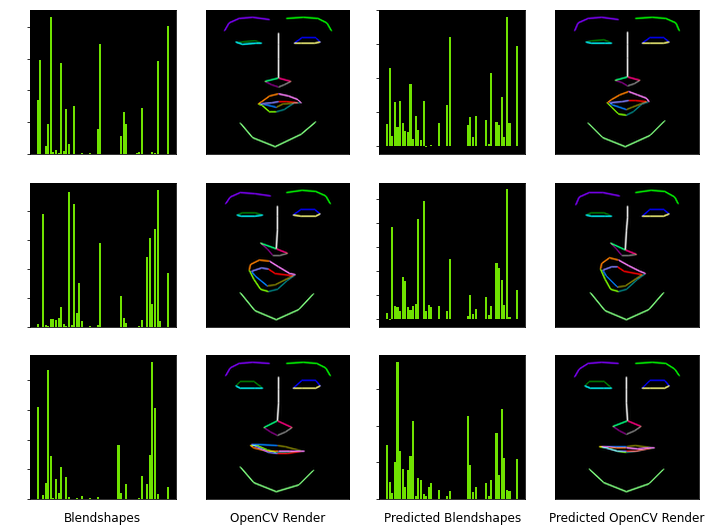

/content/facial-pose-estimation-pytorch-v2/models/networks.py:192: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  bs = int(tensor.shape[0])
/content/facial-pose-estimation-pytorch-v2/models/networks.py:193: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  res = int(tensor.shape[2])


In [11]:
helper.view_predictions(res_net,train_data)
helper.save_jit('output_run',3,res_net)